In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans , AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram , linkage
from sklearn.preprocessing import StandardScaler


In [10]:
df= pd.read_csv("/Users/ferhatkoc/Desktop/machine_learning/k_means/Mall_Customers.csv")

In [15]:
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]


In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [30]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

In [31]:
df["cluster"] = clusters

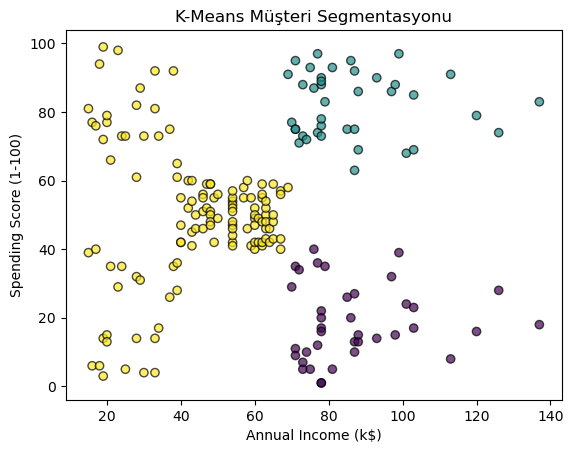

In [32]:
plt.scatter(
    X.values[:,0],
    X.values[:,1],
    c=clusters,
    cmap="viridis",
    edgecolors="k",
    alpha=0.7
)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("K-Means Müşteri Segmentasyonu")
plt.show()


In [46]:
df.groupby("cluster")[["Annual Income (k$)", "Spending Score (1-100)"]].mean()

,Annual Income (k$),Spending Score (1-100)
cluster,,
0,87.000000,18.631579
1,86.538462,82.128205
2,44.154472,49.829268


In [47]:
df.groupby("cluster")["Gender"].value_counts(normalize=True)

cluster  Gender
0        Male      0.526316
         Female    0.473684
1        Female    0.538462
         Male      0.461538
2        Female    0.593496
         Male      0.406504
Name: proportion, dtype: float64

In [48]:
linkage_matrix = linkage(X,method = "ward")

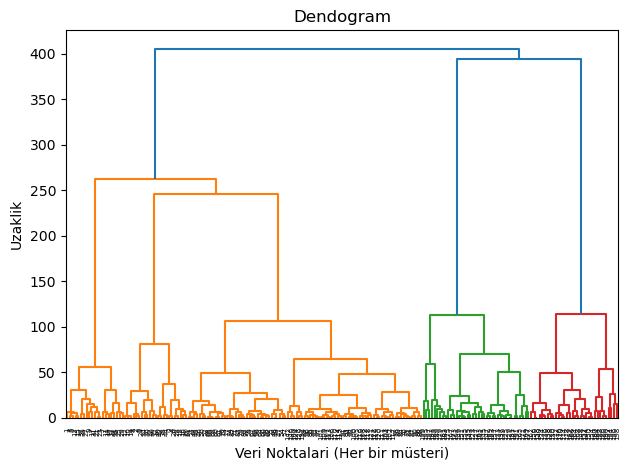

In [49]:
plt.figure()
dendrogram(linkage_matrix)
plt.title("Dendogram")
plt.xlabel("Veri Noktalari (Her bir müsteri)")
plt.ylabel("Uzaklik")

plt.tight_layout()
plt.show()

In [50]:
hc2 = AgglomerativeClustering(n_clusters=3, linkage="ward")
hc2_labels = hc2.fit_predict(X)

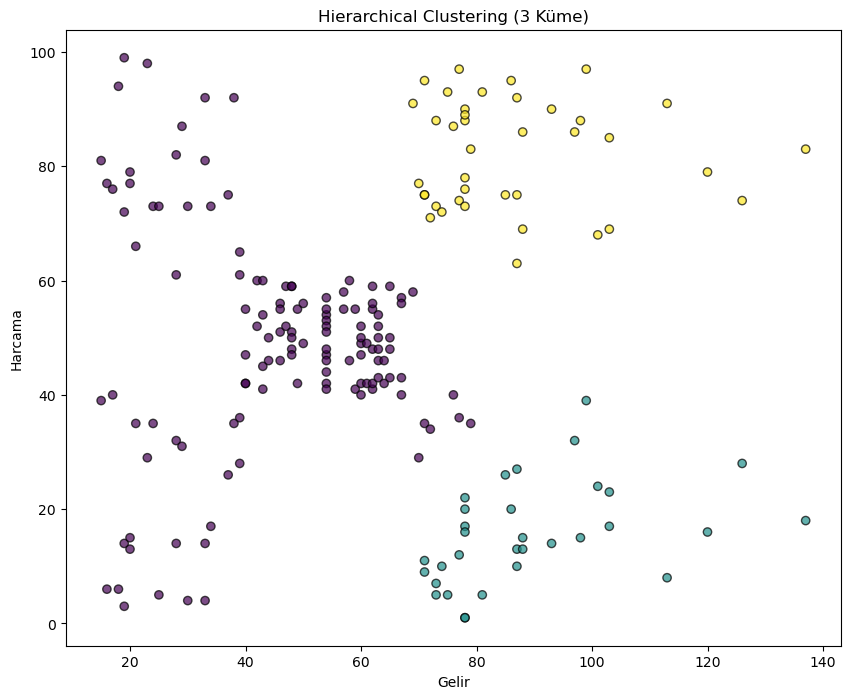

In [51]:
plt.figure(figsize=(10,8))
plt.scatter(
    X.values[:,0],
    X.values[:,1],
    c=hc2_labels,
    cmap="viridis",
    edgecolors="k",
    alpha=0.7
)
plt.title("Hierarchical Clustering (3 Küme)")
plt.xlabel("Gelir")
plt.ylabel("Harcama")
plt.show()

In [43]:
df["segment"] = df["cluster"].map({
    0: "Fiyat Duyarlı Ana Kitle",
    1: "Potansiyel Premium",
    2: "Premium Müşteriler"
})

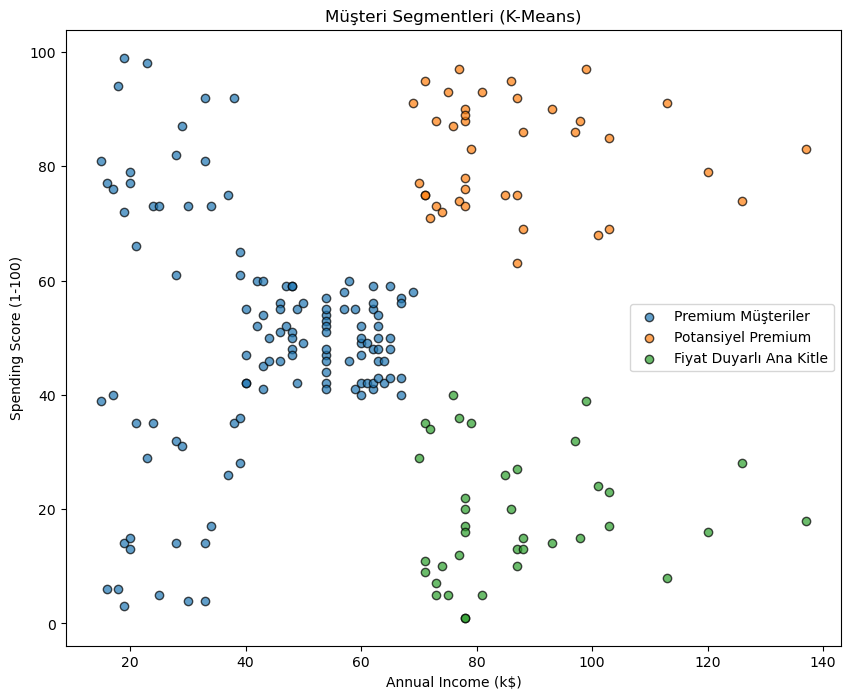

In [44]:
plt.figure(figsize=(10,8))

for seg in df["segment"].unique():
    subset = df[df["segment"] == seg]
    plt.scatter(
        subset["Annual Income (k$)"],
        subset["Spending Score (1-100)"],
        label=seg,
        alpha=0.7,
        edgecolors="k"
    )

plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Müşteri Segmentleri (K-Means)")
plt.legend()
plt.show()
#“Müşteriler K-Means ile üç segmente ayrılmış ve bu segmentler grafik ve özet tablolar ile incelenmiştir.”

"""
“Gerçek müşteri verisi üzerinde yapılan kümeleme analizinde, 
dendrogram ve K-Means sonuçları tutarlı biçimde üç müşteri segmentinin varlığını göstermiştir.”
"""